In [1]:
import pandas as pd
from darts import TimeSeries
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Read a pandas DataFrame
path = "/Users/nico_marais/code/Liedjieboer/forward_farming/clean_data/clean_sheff_data.csv"
df_sheff = pd.read_csv(path, delimiter=",")

In [28]:
df_sheff.head()

,Unnamed: 0,yyyy,mm,tmax(degC),tmin(degC),af(days),rain(mm),sun(hours),avgtemp(degC)
0,552,1929,1,3.8,0.3,12.0,40.5,23.7,2.05
1,553,1929,2,2.6,-2.5,17.0,17.1,16.9,0.05
2,554,1929,3,12.1,2.4,6.0,3.3,16.9,7.25
3,555,1929,4,10.1,2.9,3.0,25.9,108.0,6.50
4,556,1929,5,15.9,6.7,0.0,52.1,188.3,11.30


In [30]:
df_sheff['GDD'] = (((df_sheff['tmax(degC)'] + df_sheff['tmin(degC)'])/2)-10)*30

In [31]:
df_sheff.tail(20)

,Unnamed: 0,yyyy,mm,tmax(degC),tmin(degC),af(days),rain(mm),sun(hours),avgtemp(degC),GDD
1106,1658,2021,3,11.1,4.4,2.0,68.2,94.5,7.75,-67.5
1107,1659,2021,4,11.5,1.9,8.0,5.6,196.8,6.70,-99.0
1108,1660,2021,5,14.9,6.2,0.0,130.2,125.9,10.55,16.5
1109,1661,2021,6,20.6,11.6,0.0,21.6,173.6,16.10,183.0
1110,1662,2021,7,22.8,14.1,0.0,69.4,171.0,18.45,253.5
1111,1663,2021,8,19.8,13.0,0.0,30.8,99.2,16.40,192.0
1112,1664,2021,9,20.2,12.6,0.0,46.4,129.6,16.40,192.0
1113,1665,2021,10,14.9,9.2,0.0,83.0,99.1,12.05,61.5
1114,1666,2021,11,10.4,5.7,2.0,52.0,53.3,8.05,-58.5
1115,1667,2021,12,8.1,3.5,3.0,102.4,31.5,5.80,-126.0


(1000.0, 1181.25)

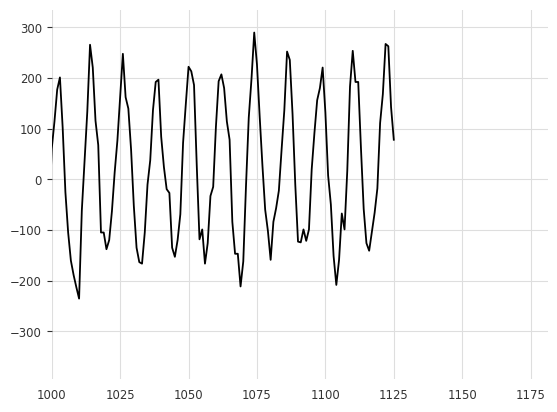

In [49]:
plt.plot(df_sheff['GDD'])
plt.xlim(left=1000)

In [33]:
spring_GDD_s = df_sheff[(df_sheff['mm'] >= 3) & (df_sheff['mm']<= 5)]['GDD']
spring_GDD_s

2       -82.5
3      -105.0
4        39.0
14     -147.0
15      -63.0
        ...  
1107    -99.0
1108     16.5
1118    -66.0
1119    -18.0
1120    111.0
Name: GDD, Length: 282, dtype: float64

In [34]:
spring_GDD_s.mean()

-39.67553191489362

In [37]:
path_r = "/Users/nico_marais/Downloads/Reims climate data.csv"
df_rheims = pd.read_csv(path_r, delimiter=",")

In [38]:
df_rheims.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,...,HTDD,HTDD_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,FRE00104048,2012-06,49.2094,4.1553,95.0,"REIMS PRUNAY, FR",NaN,NaN,6.6,",E",...,83.0,",E",100.7,",,,E",15.79,",E",20.98,",,,E",10.60,",,,E"
1,FRE00104048,2012-07,49.2094,4.1553,95.0,"REIMS PRUNAY, FR",NaN,NaN,24.3,",E",...,46.7,",E",88.2,",,,E",17.61,",E",23.24,",,,E",11.98,",,,E"
2,FRE00104048,2012-08,49.2094,4.1553,95.0,"REIMS PRUNAY, FR",NaN,NaN,43.4,",E",...,18.2,",E",16.7,",,,E",19.15,",E",26.13,",,,E",12.16,",,,E"
3,FRE00104048,2012-09,49.2094,4.1553,95.0,"REIMS PRUNAY, FR",NaN,NaN,2.1,",E",...,126.1,",E",47.7,",,,E",14.20,",E",20.71,",,,E",7.70,",,,E"
4,FRE00104048,2012-10,49.2094,4.1553,95.0,"REIMS PRUNAY, FR",NaN,NaN,0.5,",E",...,215.1,",E",48.8,",,,E",11.41,",E",15.61,",,,E",7.21,",,,E"


In [39]:
df_rheims['GDD'] = (((df_rheims['TMAX'] + df_rheims['TMIN'])/2)-10)*30

In [40]:
df_rheims.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,...,HTDD_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,GDD
0,FRE00104048,2012-06,49.2094,4.1553,95.0,"REIMS PRUNAY, FR",NaN,NaN,6.6,",E",...,",E",100.7,",,,E",15.79,",E",20.98,",,,E",10.60,",,,E",173.70
1,FRE00104048,2012-07,49.2094,4.1553,95.0,"REIMS PRUNAY, FR",NaN,NaN,24.3,",E",...,",E",88.2,",,,E",17.61,",E",23.24,",,,E",11.98,",,,E",228.30
2,FRE00104048,2012-08,49.2094,4.1553,95.0,"REIMS PRUNAY, FR",NaN,NaN,43.4,",E",...,",E",16.7,",,,E",19.15,",E",26.13,",,,E",12.16,",,,E",274.35
3,FRE00104048,2012-09,49.2094,4.1553,95.0,"REIMS PRUNAY, FR",NaN,NaN,2.1,",E",...,",E",47.7,",,,E",14.20,",E",20.71,",,,E",7.70,",,,E",126.15
4,FRE00104048,2012-10,49.2094,4.1553,95.0,"REIMS PRUNAY, FR",NaN,NaN,0.5,",E",...,",E",48.8,",,,E",11.41,",E",15.61,",,,E",7.21,",,,E",42.30


In [41]:
lst = ['03', '04', '05']

In [43]:
spring_GDD_r = df_rheims[df_rheims['DATE'].str[-2:].isin(lst)]['GDD']
spring_GDD_r

9     -197.40
10     -19.50
11      40.50
21     -69.15
22      33.15
23      93.30
33    -101.40
34      -1.20
35      81.60
45    -129.30
46     -29.85
47     101.25
57     -25.05
58     -48.45
59     141.00
69    -119.25
70      73.65
71     164.10
81     -47.25
82      -5.55
83      47.70
93     -76.50
94      69.15
95      96.00
105       NaN
106       NaN
107       NaN
117       NaN
118       NaN
Name: GDD, dtype: float64

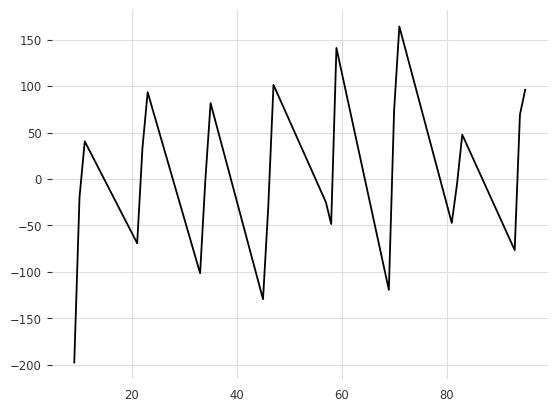

In [44]:
plt.plot(spring_GDD_r)